<a href="https://colab.research.google.com/github/MadmanMarble/Planet_U-NET/blob/main/R_matrix_analysis_plotting_20240326.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
install.packages(c('raster','sf','fasterize'))
install.packages("googledrive")
install.packages("devtools")
install.packages("caret")
devtools:::install_github("gearslaboratory/gdalUtils")

Installing packages into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘proxy’, ‘e1071’, ‘sp’, ‘Rcpp’, ‘terra’, ‘classInt’, ‘s2’, ‘units’, ‘wk’, ‘RcppArmadillo’


Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘httpuv’, ‘xtable’, ‘sourcetools’, ‘later’, ‘promises’, ‘shiny’, ‘downlit’, ‘htmlwidgets’, ‘miniUI’, ‘pkgdown’, ‘profvis’, ‘urlchecker’


Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘listenv’, ‘parallelly’, ‘future’, ‘globals’, ‘shape’, ‘future.apply’, ‘numDeriv’, ‘progressr’, ‘SQUAREM’, ‘diagram’, ‘lava’, ‘prodlim’, ‘iterators’, ‘clock’, ‘gower’, ‘hardhat’, ‘ipred’, ‘timeDate’, ‘foreach’, ‘ModelMetrics’, ‘plyr’, ‘pROC’, ‘recipes’, ‘reshape2’





R.methodsS3 (NA -> 1.8.2 ) [CRAN]
R.oo        (NA -> 1.26.0) [CRAN]
R.utils     (NA -> 2.12.3) [CRAN]


Skipping 1 packages not available: rgdal

Installing 4 packages: R.methodsS3, R.oo, rgdal, R.utils

Installing packages into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Warning message:
“package ‘rgdal’ is not available for this version of R

A version of this package for your version of R might be available elsewhere,
see the ideas at
https://cran.r-project.org/doc/manuals/r-patched/R-admin.html#Installing-packages”


── R CMD build ─────────────────────────────────────────────────────────────────
* checking for file ‘/tmp/Rtmpcn23C1/remotes19131f88b11/gearslaboratory-gdalUtils-8872aaf/DESCRIPTION’ ... OK
* preparing ‘gdalUtils’:
* checking DESCRIPTION meta-information ... OK
* checking for LF line-endings in source and make files and shell scripts
* checking for empty or unneeded directories
* building ‘gdalUtils_2.0.3.2.tar.gz’



Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Warning message in i.p(...):
“installation of package ‘/tmp/Rtmpcn23C1/file1915d68cba5/gdalUtils_2.0.3.2.tar.gz’ had non-zero exit status”


In [2]:
library(googledrive)
library(raster)
library(magrittr)
library(data.table)
library(caret)
library(ggplot2)
library(tidyr)

Loading required package: sp


Attaching package: ‘magrittr’


The following object is masked from ‘package:raster’:

    extract



Attaching package: ‘data.table’


The following object is masked from ‘package:raster’:

    shift


Loading required package: ggplot2

Loading required package: lattice


Attaching package: ‘tidyr’


The following object is masked from ‘package:magrittr’:

    extract


The following object is masked from ‘package:raster’:

    extract




In [3]:
drive_auth(use_oob = TRUE, cache = FALSE)

Please point your browser to the following url: 

https://accounts.google.com/o/oauth2/v2/auth?client_id=603366585132-frjlouoa3s2ono25d2l9ukvhlsrlnr7k.apps.googleusercontent.com&scope=https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fuserinfo.email&redirect_uri=https%3A%2F%2Fwww.tidyverse.org%2Fgoogle-callback%2F&response_type=code&state=c9efc8932b9fc54b220e8dbcef7b5d9c&access_type=offline&prompt=consent



Enter authorization code: eyJjb2RlIjoiNC8wQWVhWVNIQ3M5dGJXQ2FvVHdsakkwMlVGSDNtQmxVS3lBR3ZlcGxkbjJFUVYtWGt0dFAxUWU3c1oyZUFrVWt0V2ttVlJfQSIsInN0YXRlIjoiYzllZmM4OTMyYjlmYzU0YjIyMGU4ZGJjZWY3YjVkOWMifQ==


In [4]:
# https://drive.google.com/file/d/1tKj2X7NQELkArrQ8K8ptsk1YUi5QXs3c/view?usp=drive_link
drive_download(file = as_id('1tKj2X7NQELkArrQ8K8ptsk1YUi5QXs3c'), path =  '/content/oneYear.zip', overwrite = TRUE)

# https://drive.google.com/file/d/11uePUMaH5sYMIuqtjY7omum7QtBrfpjM/view?usp=drive_link
drive_download(file = as_id('11uePUMaH5sYMIuqtjY7omum7QtBrfpjM'), path =  '/content/twoYear.zip', overwrite = TRUE)

# https://drive.google.com/file/d/1Ak2QP2agnWtn6HW7qkjqnThCGCasqGvQ/view?usp=drive_link
drive_download(file = as_id('1Ak2QP2agnWtn6HW7qkjqnThCGCasqGvQ'), path =  '/content/threeYear.zip', overwrite = TRUE)

File downloaded:

• model_03222023_1255-20240326T202803Z-001.zip
  <id: 1tKj2X7NQELkArrQ8K8ptsk1YUi5QXs3c>

Saved locally as:

• /content/oneYear.zip

File downloaded:

• model_03222024_1255-20240327T170048Z-001.zip
  <id: 11uePUMaH5sYMIuqtjY7omum7QtBrfpjM>

Saved locally as:

• /content/twoYear.zip

File downloaded:

• model_03222023_1255-20240327T170243Z-001.zip
  <id: 1Ak2QP2agnWtn6HW7qkjqnThCGCasqGvQ>

Saved locally as:

• /content/threeYear.zip



In [6]:
unzip("/content/oneYear.zip", files = NULL, list = FALSE, overwrite = TRUE,
      junkpaths = FALSE, exdir = "/content/oneYear", unzip = "internal",
      setTimes = FALSE)

In [7]:
unzip("/content/twoYear.zip", files = NULL, list = FALSE, overwrite = TRUE,
      junkpaths = FALSE, exdir = "/content/twoYear", unzip = "internal",
      setTimes = FALSE)

In [8]:
unzip("/content/threeYear.zip", files = NULL, list = FALSE, overwrite = TRUE,
      junkpaths = FALSE, exdir = "/content/threeYear", unzip = "internal",
      setTimes = FALSE)

In [20]:
# https://drive.google.com/file/d/1Moqrj_kaYIKoq5q9qQ9pdeW-ADpbLd3u/view?usp=drive_link
drive_download(file = as_id('1Moqrj_kaYIKoq5q9qQ9pdeW-ADpbLd3u'), path =  '/content/groudTruth_labels.zip', overwrite = TRUE)

File downloaded:

• test_labels-20240326T203837Z-001.zip <id: 1Moqrj_kaYIKoq5q9qQ9pdeW-ADpbLd3u>

Saved locally as:

• /content/groudTruth_labels.zip



In [21]:
unzip("/content/groudTruth_labels.zip", files = NULL, list = FALSE, overwrite = TRUE,
      junkpaths = FALSE, exdir = "/content/groudTruth_labels", unzip = "internal",
      setTimes = FALSE)

pause

In [7]:
oneYear_file_list <-list.files("/content/oneYear/model_03222023_1255", pattern = "*.tif", full.names = TRUE)

In [8]:
oneYear_file_list

[1] "/content/oneYear/model_03222023_1255/epoch_1_1530_planet_stack_utm4.tif" 
 [2] "/content/oneYear/model_03222023_1255/epoch_1_1532_planet_stack_utm4.tif" 
 [3] "/content/oneYear/model_03222023_1255/epoch_1_1546_planet_stack_utm4.tif" 
 [4] "/content/oneYear/model_03222023_1255/epoch_1_1557_planet_stack_utm4.tif" 
 [5] "/content/oneYear/model_03222023_1255/epoch_1_2118_planet_stack_utm4.tif" 
 [6] "/content/oneYear/model_03222023_1255/epoch_1_2355_planet_stack_utm4.tif" 
 [7] "/content/oneYear/model_03222023_1255/epoch_1_823_planet_stack_utm4.tif"  
 [8] "/content/oneYear/model_03222023_1255/epoch_11_1530_planet_stack_utm4.tif"
 [9] "/content/oneYear/model_03222023_1255/epoch_11_1532_planet_stack_utm4.tif"
[10] "/content/oneYear/model_03222023_1255/epoch_11_1546_planet_stack_utm4.tif"
[11] "/content/oneYear/model_03222023_1255/epoch_11_1557_planet_stack_utm4.tif"
[12] "/content/oneYear/model_03222023_1255/epoch_11_2118_planet_stack_utm4.tif"
[13] "/content/oneYear/model_03222023_1255/epoch_11_2355_planet_stack_utm4.tif"
[14] "/content/oneYear/model_03222023_1255/epoch_11_823_planet_stack_utm4.tif" 
[15] "/content/oneYear/model_03222023_1255/epoch_16_1530_planet_stack_utm4.tif"
[16] "/content/oneYear/model_03222023_1255/epoch_16_1532_planet_stack_utm4.tif"
[17] "/content/oneYear/model_03222023_1255/epoch_16_1546_planet_stack_utm4.tif"
[18] "/content/oneYear/model_03222023_1255/epoch_16_1557_planet_stack_utm4.tif"
[19] "/content/oneYear/model_03222023_1255/epoch_16_2118_planet_stack_utm4.tif"
[20] "/content/oneYear/model_03222023_1255/epoch_16_2355_planet_stack_utm4.tif"
[21] "/content/oneYear/model_03222023_1255/epoch_16_823_planet_stack_utm4.tif" 
[22] "/content/oneYear/model_03222023_1255/epoch_21_1530_planet_stack_utm4.tif"
[23] "/content/oneYear/model_03222023_1255/epoch_21_1532_planet_stack_utm4.tif"
[24] "/content/oneYear/model_03222023_1255/epoch_21_1546_planet_stack_utm4.tif"
[25] "/content/oneYear/model_03222023_1255/epoch_21_1557_planet_stack_utm4.tif"
[26] "/content/oneYear/model_03222023_1255/epoch_21_2118_planet_stack_utm4.tif"
[27] "/content/oneYear/model_03222023_1255/epoch_21_2355_planet_stack_utm4.tif"
[28] "/content/oneYear/model_03222023_1255/epoch_21_823_planet_stack_utm4.tif" 
[29] "/content/oneYear/model_03222023_1255/epoch_26_1530_planet_stack_utm4.tif"
[30] "/content/oneYear/model_03222023_1255/epoch_26_1532_planet_stack_utm4.tif"
[31] "/content/oneYear/model_03222023_1255/epoch_26_1546_planet_stack_utm4.tif"
[32] "/content/oneYear/model_03222023_1255/epoch_26_1557_planet_stack_utm4.tif"
[33] "/content/oneYear/model_03222023_1255/epoch_26_2118_planet_stack_utm4.tif"
[34] "/content/oneYear/model_03222023_1255/epoch_26_2355_planet_stack_utm4.tif"
[35] "/content/oneYear/model_03222023_1255/epoch_26_823_planet_stack_utm4.tif" 
[36] "/content/oneYear/model_03222023_1255/epoch_31_1530_planet_stack_utm4.tif"
[37] "/content/oneYear/model_03222023_1255/epoch_31_1532_planet_stack_utm4.tif"
[38] "/content/oneYear/model_03222023_1255/epoch_31_1546_planet_stack_utm4.tif"
[39] "/content/oneYear/model_03222023_1255/epoch_31_1557_planet_stack_utm4.tif"
[40] "/content/oneYear/model_03222023_1255/epoch_31_2118_planet_stack_utm4.tif"
[41] "/content/oneYear/model_03222023_1255/epoch_31_2355_planet_stack_utm4.tif"
[42] "/content/oneYear/model_03222023_1255/epoch_31_823_planet_stack_utm4.tif" 
[43] "/content/oneYear/model_03222023_1255/epoch_36_1530_planet_stack_utm4.tif"
[44] "/content/oneYear/model_03222023_1255/epoch_36_1532_planet_stack_utm4.tif"
[45] "/content/oneYear/model_03222023_1255/epoch_36_1546_planet_stack_utm4.tif"
[46] "/content/oneYear/model_03222023_1255/epoch_36_1557_planet_stack_utm4.tif"
[47] "/content/oneYear/model_03222023_1255/epoch_36_2118_planet_stack_utm4.tif"
[48] "/content/oneYear/model_03222023_1255/epoch_36_2355_planet_stack_utm4.tif"
[49] "/content/oneYear/model_03222023_1255/epoch_36_823_planet_stack_utm4.tif" 
[50] "/content/oneYear/model_03222023_1255/epoch_41_1530_planet_stack_utm4.tif"
[

In [9]:
oneYear_raster_list <- oneYear_file_list[57] %>% lapply(stack)

In [10]:
oneYear_raster_list

[[1]]
class      : RasterStack 
dimensions : 384, 384, 147456, 1  (nrow, ncol, ncell, nlayers)
resolution : 1, 1  (x, y)
extent     : 628182, 628566, 2365605, 2365989  (xmin, xmax, ymin, ymax)
crs        : +proj=utm +zone=4 +datum=NAD83 +units=m +no_defs 
names      : epoch_46_1530_planet_stack_utm4 



In [11]:
groudTruth_file_list <-list.files("/content/groudTruth_labels/test_labels", pattern = "*.tif", full.names = TRUE)

In [12]:
groudTruth_file_list

[1] "/content/groudTruth_labels/test_labels/1530_nwi_ccap_filled_utm4.tif"
[2] "/content/groudTruth_labels/test_labels/1532_nwi_ccap_filled_utm4.tif"
[3] "/content/groudTruth_labels/test_labels/1546_nwi_ccap_filled_utm4.tif"
[4] "/content/groudTruth_labels/test_labels/1557_nwi_ccap_filled_utm4.tif"
[5] "/content/groudTruth_labels/test_labels/2118_nwi_ccap_filled_utm4.tif"
[6] "/content/groudTruth_labels/test_labels/2355_nwi_ccap_filled_utm4.tif"
[7] "/content/groudTruth_labels/test_labels/823_nwi_ccap_filled_utm4.tif"

In [13]:
groudTruth_raster_list <- groudTruth_file_list[1] %>% lapply(stack)

In [14]:
groudTruth_raster_list

[[1]]
class      : RasterStack 
dimensions : 384, 384, 147456, 1  (nrow, ncol, ncell, nlayers)
resolution : 1, 1  (x, y)
extent     : 628182, 628566, 2365605, 2365989  (xmin, xmax, ymin, ymax)
crs        : +proj=utm +zone=4 +datum=NAD83 +units=m +no_defs 
names      : X1530_nwi_ccap_filled_utm4 
min values :                          3 
max values :                         11 



In [15]:
val_dt <- data.table(truth = values(groudTruth_raster_list[[1]]),prediction = values(oneYear_raster_list[[1]]))

In [16]:
val_dt$truth.X1530_nwi_ccap_filled_utm4

[1] 10 10 10 10 10 10 10 10 10 10 10 10 10 10 10 10 10 10 10 10 10 10 10 10
   [25] 10 10 10 10 10 10 10 10 10 10 10 10 10 10 10 10 10 10 10 10 10 10 10 10
   [49] 10 10 10 10 10 10 10 10 10 10 10 10 10 10 10 10 10 10 10 10 10 10 10 10
   [73] 10 10 10 10 10 10 10 10 10 10 10 10 10 10 10 10 10 10 10 10 10 10 10 10
   [97] 10 10 10 10 10 10 10 10 10 10 10 10 10 10 10 10 10 10 10 10 10 10 10 10
  [121] 10 10 10 10 10 10 10 10 10 10 10 10 10 10 10 10 10 10 10 10 10 10 10 10
  [145] 10 10 10 10 10 10 10 10 10 10 10 10 10 10 10 10 10 10 10 10  3  3  3  3
  [169]  3  3  3  3  3  3  3  3  3  3  3  3  3  3  3  3  3  3  3  3  3  3  3  3
  [193]  3  3  3  3  3  3  3  3  3  3  3  3  3  3  3  3  3  3  3  3  3  3  3  3
  [217]  3  3  3  3  3  3  3  3  3  3  3  3  3  3  3  3  3  3  3  3  3  3  3  3
  [241]  3  3  3  3  3  3  3  3  3  3  3  3  3  3  3  3  3  3  3  3  3  3  3  3
  [265]  3  3  3  3  3  3  3  3  3  3  3  3  3  3  3  3  3  3  3  3  3  3  3  3
  [289]  3  3  3  3  3  3  3  3  3  3  3  3  3  3  3  3  3  3  3  3  3  3  3  3
  [313]  3  3  3  3  3  3  3  3  3  3  3  3  3  3  3  3  3  3  3  3  3  3  3  3
  [337]  3  3  3  3  3  3  3  3  3  3  3  3  3  3  3  3  3  3  3  3  3  3  3  3
  [361]  3  3  3  3  3  3  3  3  3  3  3  3  3  3  3  3  3  3  3  3  3  3  3  3
  [385] 10 10 10 10 10 10 10 10 10 10 10 10 10 10 10 10 10 10 10 10 10 10 10 10
  [409] 10 10 10 10 10 10 10 10 10 10 10 10 10 10 10 10 10 10 10 10 10 10 10 10
  [433] 10 10 10 10 10 10 10 10 10 10 10 10 10 10 10 10 10 10 10 10 10 10 10 10
  [457] 10 10 10 10 10 10 10 10 10 10 10 10 10 10 10 10 10 10 10 10 10 10 10 10
  [481] 10 10 10 10 10 10 10 10 10 10 10 10 10 10 10 10 10 10 10 10 10 10 10 10
  [505] 10 10 10 10 10 10 10 10 10 10 10 10 10 10 10 10 10 10 10 10 10 10 10 10
  [529] 10 10 10 10 10 10 10 10 10 10 10 10 10 10 10 10 10 10 10 10  3  3  3  3
  [553]  3  3  3  3  3  3  3  3  3  3  3  3  3  3  3  3  3  3  3  3  3  3  3  3
  [577]  3  3  3  3  3  3  3  3  3  3  3  3  3  3  3  3  3  3  3  3  3  3  3  3
  [601]  3  3  3  3  3  3  3  3  3  3  3  3  3  3  3  3  3  3  3  3  3  3  3  3
  [625]  3  3  3  3  3  3  3  3  3  3  3  3  3  3  3  3  3  3  3  3  3  3  3  3
  [649]  3  3  3  3  3  3  3  3  3  3  3  3  3  3  3  3  3  3  3  3  3  3  3  3
  [673]  3  3  3  3  3  3  3  3  3  3  3  3  3  3  3  3  3  3  3  3  3  3  3  3
  [697]  3  3  3  3  3  3  3  3  3  3  3  3  3  3  3  3  3  3  3  3  3  3  3  3
  [721]  3  3  3  3  3  3  3  3  3  3  3  3  3  3  3  3  3  3  3  3  3  3  3  3
  [745]  3  3  3  3  3  3  3  3  3  3  3  3  3  3  3  3  3  3  3  3  3  3  3  3
  [769] 10 10 10 10 10 10 10 10 10 10 10 10 10 10 10 10 10 10 10 10 10 10 10 10
  [793] 10 10 10 10 10 10 10 10 10 10 10 10 10 10 10 10 10 10 10 10 10 10 10 10
  [817] 10 10 10 10 10 10 10 10 10 10 10 10 10 10 10 10 10 10 10 10 10 10 10 10
  [841] 10 10 10 10 10 10 10 10 10 10 10 10 10 10 10 10 10 10 10 10 10 10 10 10
  [865] 10 10 10 10 10 10 10 10 10 10 10 10 10 10 10 10 10 10 10 10 10 10 10 10
  [889] 10 10 10 10 10 10 10 10 10 10 10 10 10 10 10 10 10 10 10 10 10 10 10 10
  [913] 10 10 10 10 10 10 10 10 10 10 10 10 10 10 10 10 10 10  3  3  3  3  3  3
  [937]  3  3  3  3  3  3  3  3  3  3  3  3  3  3  3  3  3  3  3  3  3  3  3  3
  [961]  3  3  3  3  3  3  3  3  3  3  3  3  3  3  3  3  3  3  3  3  3  3  3  3
  [985]  3  3  3  3  3  3  3  3  3  3  3  3  3  3  3  3  3  3  3  3  3  3  3  3
 [1009]  3  3  3  3  3  3  3  3  3  3  3  3  3  3  3  3  3  3  3  3  3  3  3  3
 [1033]  3  3  3  3  3  3  3  3  3  3  3  3  3  3  3  3  3  3  3  3  3  3  3  3
 [1057]  3  3  3  3  3  3  3  3  3  3  3  3  3  3  3  3  3  3  3  3  3  3  3  3
 [1081]  3  3  3  3  3  3  3  3  3  3  3  3  3  3  3  3  3  3  3  3  3  3  3  3
 [1105]  3  3  3  3  3  3  3  3  3  3  3  3  3  3  3  3  3  3  3  3  3  3  3  3
 [1129]  3  3  3  3  3  3  3  3  3  3  3  3  3  3  3  3  3  3  3  3  3  3  3  3
 [1153] 10 10 10 10 10 10 10 10 10 10 10 10 10 10 10 10 10 10 10 10 10 10 10 10
 [1177] 10 10 10 10 10 10 10 10 10 10 10 10 10 10 10 10 10 10 10 10 10 10 10 10
 [12

In [17]:
val_dt$prediction.epoch_46_1530_planet_stack_utm4

[1] 10 10 10 10 10 10 10 10 10 10 10 10 10 10 10 10 10 10 10 10 10 10 10 10
   [25] 10 10 10 10 10 10 10 10 10 10 10 10 10 10 10 10 10 10 10 10 10 10 10 10
   [49] 10 10 10 10 10 10 10 10 10 10 10 10 10 10 10 10 10 10 10 10 10 10 10 10
   [73] 10 10 10 10 10 10 10 10 10 10 10 10 10 10 10 10 10 10 10 10 10 10 10 10
   [97] 10 10 10 10 10 10 10 10 10 10 10 10 10 10 10 10 10 10 10 10 10 10 10 10
  [121] 10 10 10 10 10 10 10 10 10 10 10 10 10 10 10 10 10 10 10 10 10 10 10 10
  [145] 10 10 10 10 10 10 10 10 10 10 10 10 10 10 10 10 10 10 10 10 10 10 10 10
  [169] 10 10 10 10 10 10 10 10 10 10 10 10 10 10 10 10 10 10 10 10 10 10 10 10
  [193] 10 10 10 10 10 10 10 10 10 10 10 10 10 10 10 10 10 10 10 10 10 10 10 10
  [217] 10 10 10 10 10 10 10 10 10 10 10 10 10 10 10 10 10 10 10 10 10 10 10 10
  [241] 10 10 10 10 10 10 10 10 10 10 10 10 10 10 10 10 10 10 10 10 10 10 10 10
  [265] 10 10 10 10 10 10 10 10 10 10 10 10 10 10 10 10 10 10 10 10 10 10 10 10
  [289] 10 10 10 10 10 10 10 10 10 10 10 10 10 10 10 10 10 10 10 10 10 10 10 10
  [313] 10 10 10 10 10 10 10 10 10 10 10 10 10 10 10 10 10 10 10 10 10 10 10 10
  [337] 10 10 10 10 10 10 10 10 10 10 10 10 10 10 10 10 10 10 10 10 10 10 10 10
  [361] 10 10 10 10 10 10 10 10 10 10 10 10 10 10 10 10 10 10 10 10 10 10 10 10
  [385] 10 10 10 10 10 10 10 10 10 10 10 10 10 10 10 10 10 10 10 10 10 10 10 10
  [409] 10 10 10 10 10 10 10 10 10 10 10 10 10 10 10 10 10 10 10 10 10 10 10 10
  [433] 10 10 10 10 10 10 10 10 10 10 10 10 10 10 10 10 10 10 10 10 10 10 10 10
  [457] 10 10 10 10 10 10 10 10 10 10 10 10 10 10 10 10 10 10 10 10 10 10 10 10
  [481] 10 10 10 10 10 10 10 10 10 10 10 10 10 10 10 10 10 10 10 10 10 10 10 10
  [505] 10 10 10 10 10 10 10 10 10 10 10 10 10 10 10 10 10 10 10 10 10 10 10 10
  [529] 10 10 10 10 10 10 10 10 10  1  1  1  1  1  1  1 10 10 10 10 10 10 10 10
  [553] 10 10 10 10 10 10 10 10 10 10 10 10 10 10 10 10 10 10 10 10 10 10 10 10
  [577] 10 10 10 10 10 10 10 10 10 10 10 10 10 10 10 10 10 10 10 10 10 10 10 10
  [601] 10 10 10 10 10 10 10 10 10 10 10 10 10 10 10 10 10 10 10 10 10 10 10 10
  [625] 10 10 10 10 10 10 10 10 10 10 10 10 10 10 10 10 10 10 10 10 10 10 10 10
  [649] 10 10 10 10 10 10 10 10 10 10 10 10 10 10 10 10 10 10 10 10 10 10 10 10
  [673] 10 10 10 10 10 10 10 10 10 10 10 10 10 10 10 10 10 10 10 10 10 10 10  1
  [697]  1  1  1  1  1  1  1  1  1  1 10 10 10 10 10 10 10 10 10 10 10 10 10 10
  [721] 10 10 10 10 10 10 10 10 10 10 10 10 10 10 10 10 10 10 10 10 10 10 10 10
  [745] 10 10 10 10 10 10 10 10 10 10 10 10 10 10 10 10 10 10 10 10 10 10 10 10
  [769] 10 10 10 10 10 10 10 10 10 10 10 10 10 10 10 10 10 10 10 10 10 10 10 10
  [793] 10 10 10 10 10 10 10 10 10 10 10 10 10 10 10 10 10 10 10 10 10 10 10 10
  [817] 10 10 10 10 10 10 10 10 10 10 10 10 10 10 10 10 10 10 10 10 10 10 10 10
  [841] 10 10 10 10 10 10 10 10 10 10 10 10 10 10 10 10 10 10 10 10 10 10 10 10
  [865] 10 10 10 10 10 10 10 10 10 10 10 10 10 10 10 10 10 10 10 10 10 10 10 10
  [889] 10 10 10 10 10 10 10 10 10 10 10 10 10 10 10 10 10 10 10 10 10 10 10 10
  [913] 10  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1
  [937]  1  1  1  1  1  1  1  1 10 10 10 10 10 10 10 10 10  1  1  1  1  1  1  1
  [961]  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1
  [985]  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1
 [1009]  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1
 [1033]  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1
 [1057]  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1
 [1081]  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1 10 10
 [1105] 10 10 10 10 10 10 10 10 10 10 10 10 10 10 10 10 10 10 10 10 10 10 10 10
 [1129] 10 10 10 10 10 10 10 10 10 10 10 10 10 10 10 10 10 10 10 10 10 10 10 10
 [1153] 10 10 10 10 10 10 10 10 10 10 10 10 10 10 10 10 10 10 10 10 10 10 10 10
 [1177] 10 10 10 10 10 10 10 10 10 10 10 10 10 10 10 10 10 10 10 10 10 10 10 10
 [12

In [ ]:
val_dt

Expand data table to all the files in oneYear_raster_list and groundTruth_raster_list


In [46]:
# Function to extract values and create a data table
create_val_dt <- function(groundTruth_path, prediction_path) {
  groundTruth_raster <- raster(groundTruth_path)
  prediction_raster <- raster(prediction_path)

  validation_dt <- data.table(
    truth = values(groundTruth_raster),
    prediction = values(prediction_raster)
  )

  return(validation_dt)
}

In [50]:
match_files <- function(gt_list, pred_list) {
  matched <- list()

  # Extract the core identifier from ground truth file names (e.g., "1530")
  # Assuming ground truth file naming format is "{id}_nwi_ccap_filled_utm4.tif"
  gt_ids <- sapply(gt_list, function(x) strsplit(tools::file_path_sans_ext(x), "_")[[1]][1])

  for (i in seq_along(gt_list)) {
    gt_path <- gt_list[i]
    gt_id <- gt_ids[i]

    # Find all prediction files that contain the ground truth id
    # Assuming prediction file naming format is "epoch_{epoch}_{id}_planet_stack_utm4.tif"
    pattern <- paste0(".*", gt_id, ".*\\.tif$")
    matched_pred_paths <- pred_list[grepl(pattern, pred_list)]

    # Store the matched ground truth and prediction paths
    matched[[gt_id]] <- list(
      groundTruth = gt_path,
      prediction = matched_pred_paths
    )
  }

  return(matched)
}


In [51]:
# match_files(groudTruth_raster_list, oneYear_raster_list)

Warning message in grepl(pattern, pred_list):
“TRE pattern compilation error 'Missing ')''”


ERROR: Error in grepl(pattern, pred_list): invalid regular expression '.*raster(ncols=384, nrows=384, xmn=628182, xmx=628566, ymn=2365605, ymx=2365989, crs='+proj=utm +zone=4 +datum=NAD83 +units=m +no.*\.tif$', reason 'Missing ')''


In [54]:
# Match files
matched_files <- match_files(groudTruth_file_list, oneYear_file_list)

In [55]:
matched_files

$`1530`
$`1530`$groundTruth
[1] "/content/groudTruth_labels/test_labels/1530_nwi_ccap_filled_utm4.tif"

$`1530`$prediction
 [1] "/content/oneYear/model_03222023_1255/epoch_1_1530_planet_stack_utm4.tif" 
 [2] "/content/oneYear/model_03222023_1255/epoch_11_1530_planet_stack_utm4.tif"
 [3] "/content/oneYear/model_03222023_1255/epoch_16_1530_planet_stack_utm4.tif"
 [4] "/content/oneYear/model_03222023_1255/epoch_21_1530_planet_stack_utm4.tif"
 [5] "/content/oneYear/model_03222023_1255/epoch_26_1530_planet_stack_utm4.tif"
 [6] "/content/oneYear/model_03222023_1255/epoch_31_1530_planet_stack_utm4.tif"
 [7] "/content/oneYear/model_03222023_1255/epoch_36_1530_planet_stack_utm4.tif"
 [8] "/content/oneYear/model_03222023_1255/epoch_41_1530_planet_stack_utm4.tif"
 [9] "/content/oneYear/model_03222023_1255/epoch_46_1530_planet_stack_utm4.tif"
[10] "/content/oneYear/model_03222023_1255/epoch_6_1530_planet_stack_utm4.tif" 


$`1532`
$`1532`$groundTruth
[1] "/content/groudTruth_labels/test_labels/1532_nwi_ccap_filled_utm4.tif"

$`1532`$prediction
 [1] "/content/oneYear/model_03222023_1255/epoch_1_1532_planet_stack_utm4.tif" 
 [2] "/content/oneYear/model_03222023_1255/epoch_11_1532_planet_stack_utm4.tif"
 [3] "/content/oneYear/model_03222023_1255/epoch_16_1532_planet_stack_utm4.tif"
 [4] "/content/oneYear/model_03222023_1255/epoch_21_1532_planet_stack_utm4.tif"
 [5] "/content/oneYear/model_03222023_1255/epoch_26_1532_planet_stack_utm4.tif"
 [6] "/content/oneYear/model_03222023_1255/epoch_31_1532_planet_stack_utm4.tif"
 [7] "/content/oneYear/model_03222023_1255/epoch_36_1532_planet_stack_utm4.tif"
 [8] "/content/oneYear/model_03222023_1255/epoch_41_1532_planet_stack_utm4.tif"
 [9] "/content/oneYear/model_03222023_1255/epoch_46_1532_planet_stack_utm4.tif"
[10] "/content/oneYear/model_03222023_1255/epoch_6_1532_planet_stack_utm4.tif" 


$`1546`
$`1546`$groundTruth
[1] "/content/groudTruth_labels/test_labels/1546_nwi_ccap_filled_utm4.tif"

$`1546`$prediction
 [1] "/content/oneYear/model_03222023_1255/epoch_1_1546_planet_stack_utm4.tif" 
 [2] "/content/oneYear/model_03222023_1255/epoch_11_1546_planet_stack_utm4.tif"
 [3] "/content/oneYear/model_03222023_1255/epoch_16_1546_planet_stack_utm4.tif"
 [4] "/content/oneYear/model_03222023_1255/epoch_21_1546_planet_stack_utm4.tif"
 [5] "/content/oneYear/model_03222023_1255/epoch_26_1546_planet_stack_utm4.tif"
 [6] "/content/oneYear/model_03222023_1255/epoch_31_1546_planet_stack_utm4.tif"
 [7] "/content/oneYear/model_03222023_1255/epoch_36_1546_planet_stack_utm4.tif"
 [8] "/content/oneYear/model_03222023_1255/epoch_41_1546_planet_stack_utm4.tif"
 [9] "/content/oneYear/model_03222023_1255/epoch_46_1546_planet_stack_utm4.tif"
[10] "/content/oneYear/model_03222023_1255/epoch_6_1546_planet_stack_utm4.tif" 


$`1557`
$`1557`$groundTruth
[1] "/content/groudTruth_labels/test_labels/1557_nwi_ccap_filled_utm4.tif"

$`1557`$prediction
 [1] "/content/oneYear/model_03222023_1255/epoch_1_1557_planet_stack_utm4.tif" 
 [2] "/content/oneYear/model_03222023_1255/epoch_11_1557_planet_stack_utm4.tif"
 [3] "/content/oneYear/model_03222023_1255/epoch_16_1557_planet_stack_utm4.tif"
 [4] "/content/oneYear/model_03222023_1255/epoch_21_1557_planet_stack_utm4.tif"
 [5] "/content/oneYear/model_03222023_1255/epoch_26_1557_planet_stack_utm4.tif"
 [6] "/content/oneYear/model_03222023_1255/epoch_31_1557_planet_stack_utm4.tif"
 [7] "/content/oneYear/model_03222023_1255/epoch_36_1557_planet_stack_utm4.tif"
 [8] "/content/oneYear/model_03222023_1255/epoch_41_1557_planet_stack_utm4.tif"
 [9] "/content/oneYear/model_03222023_1255/epoch_46_1557_planet_stack_utm4.tif"
[10] "/content/oneYear/model_03222023_1255/epoch_6_1557_planet_stack_utm4.tif" 


$`2118`
$`2118`$groundTruth
[1] "/content/groudTruth_labels/test_labels/2118_nwi_ccap_filled_utm4.tif"

$`2118`$prediction
 [1] "/content/oneYear/model_03222023_1255/epoch_1_2118_planet_stack_utm4.tif" 
 [2] "/content/oneYear/model_03222023_1255/epoch_11_2118_planet_stack_utm4.tif"
 [3] "/content/on

In [56]:
# # Process each match
# results <- list()
# for (file_id in names(matched_files)) {
#   for (prediction_path in matched_files[[file_id]]$prediction) {
#     val_dt <- create_val_dt(matched_files[[file_id]]$groundTruth, prediction_path)
#     # Do something with val_dt, e.g., store, analyze, etc.
#     # For demonstration, we'll just store it
#     results[[paste(file_id, basename(prediction_path), sep = "_")]] <- val_dt
#   }
# }

# Process each match
results <- list()
for (file_id in names(matched_files)) {
  gt_path <- matched_files[[file_id]]$groundTruth
  for (prediction_path in matched_files[[file_id]]$prediction) {
    val_dt <- create_val_dt(gt_path, prediction_path)
    # Store the data.table for further analysis or evaluation
    results_key <- paste(file_id, tools::file_path_sans_ext(basename(prediction_path)), sep = "_")
    results[[results_key]] <- val_dt
  }
}

In [59]:
results %>% length

[1] 70

pause

In [41]:
val_confus_dt <- confusionMatrix(create_val_dt$truth %>% factor(levels = 0:12), create_val_dt$prediction %>% factor(levels =  0:12))

ERROR: Error in create_val_dt$truth: object of type 'closure' is not subsettable


In [40]:
confus_dt <- confusionMatrix(val_dt$truth %>% factor(levels = 0:12), val_dt$prediction %>% factor(levels =  0:12))



In [167]:
confus_dt

Confusion Matrix and Statistics

          Reference
Prediction     0     1     2     3     4     5     6     7     8     9    10
        0      0     0     0     0     0     0     0     0     0     0     0
        1      0     0     0     0     0     0     0     0     0     0     0
        2      0     0     0     0     0     0     0     0     0     0     0
        3      0 67532     0     0     0     0     9     0     0     0   960
        4      0     0     0     0     0     0     0     0     0     0     0
        5      0 15859     0     0     0     0     0     0     0     0   567
        6      0  2885     0     0     0     0     0     0     0     0  1071
        7      0     0     0     0     0     0     0     0     0     0     0
        8      0  1148     0     0     0     0     0     0     0     0     0
        9      0     0     0     0     0     0     0     0     0     0     0
        10     0 50968     0     0     0     0     0     0     0     0  2530
        11     0  3545 

In [168]:
confusion_df <- data.frame(confus_dt$table)

In [ ]:
confusion_df  # A data.frame: 169 × 3 Prediction	Reference	Freq

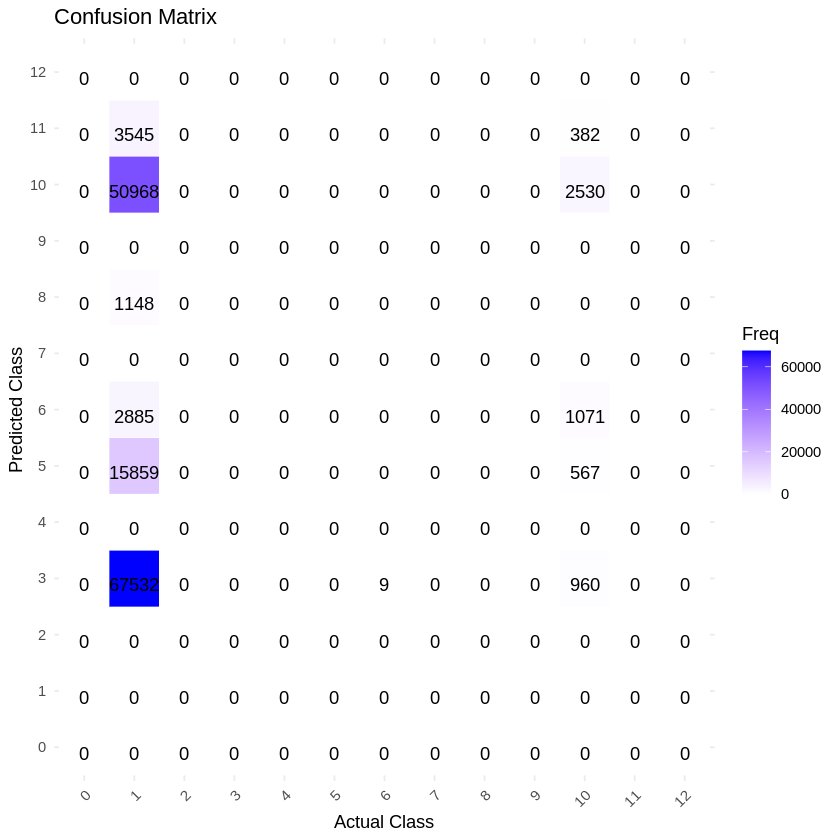

In [170]:
ggplot(data = confusion_df, aes(x = Reference, y = Prediction, fill = Freq)) +
  geom_tile(color = "white") +
  scale_fill_gradient(low = "white", high = "blue") +
  geom_text(aes(label = Freq), vjust = 1) +
  theme_minimal() +
  labs(title = "Confusion Matrix", x = "Actual Class", y = "Predicted Class") +
  theme(axis.text.x = element_text(angle = 45, hjust = 1))

In [122]:
byClass_dt <- confusion_dt$byClass %>% data.table

In [123]:
byClass_dt

Sensitivity,Specificity,Pos Pred Value,Neg Pred Value,Precision,Recall,F1,Prevalence,Detection Rate,Detection Prevalence,Balanced Accuracy
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
NA,1.0000000,NA,NA,NA,NA,NA,0.00000000,0.0000000,0.000000000,NA
0.000000,1.0000000,NaN,0.4332275,NA,0.000000,NA,0.56677246,0.0000000,0.000000000,0.5000000
NA,1.0000000,NA,NA,NA,NA,NA,0.00000000,0.0000000,0.000000000,NA
NA,0.5354479,NA,NA,0.000000,NA,NA,0.00000000,0.0000000,0.464552138,NA
NA,1.0000000,NA,NA,NA,NA,NA,0.00000000,0.0000000,0.000000000,NA
NA,0.8886041,NA,NA,0.000000,NA,NA,0.00000000,0.0000000,0.111395942,NA
NA,0.9731717,NA,NA,0.000000,NA,NA,0.00000000,0.0000000,0.026828342,NA
0.000000,1.0000000,NaN,0.9936795,NA,0.000000,NA,0.00632053,0.0000000,0.000000000,0.5000000
NA,0.9922146,NA,NA,0.000000,NA,NA,0.00000000,0.0000000,0.007785373,NA


In [126]:
# byClass_df <- data.frame(byClass_dt$table)
byClass_df <- confusion_dt$byClass %>% data.frame

In [ ]:
byClass_df # Sensitivity	Specificity	Pos.Pred.Value	Neg.Pred.Value	Precision	Recall	F1	Prevalence	Detection.Rate	Detection.Prevalence	Balanced.Accurac

In [129]:
byClass_df$Sensitivity

[1]       NA 0.000000       NA       NA       NA       NA       NA 0.000000
 [9]       NA       NA 0.492502       NA       NA

pause


In [110]:
prettyConfused <- function(Actual, Predict, colors=c("white", "red4", "dodgerblue3"), text.scl=5) {
  actual = as.data.frame(table(Actual))
  names(actual) = c("Actual", "ActualFreq")

  # Build confusion matrix
  confusion = as.data.frame(table(Actual, Predict))
  names(confusion) = c("Actual", "Predicted", "Freq")

  # Calculate percentage of test cases based on actual frequency
  confusion = merge(confusion, actual, by='Actual')
  confusion$Percent = confusion$Freq / confusion$ActualFreq * 100

  # Determine color scale based on whether prediction matches the actual label
  confusion$ColorScale <- ifelse(confusion$Actual == confusion$Predicted, confusion$Percent, -confusion$Percent)

  # Label for the tiles
  confusion$Label <- paste(round(confusion$Percent, 0), "%, n=", confusion$Freq, sep="")

  # ggplot visualization
  tile <- ggplot(confusion, aes(x=Actual, y=Predicted)) +
    geom_tile(aes(fill = ColorScale), color="white") +
    scale_fill_gradient2(low=colors[2], mid=colors[1], high=colors[3], midpoint=0) +
    geom_text(aes(label=Label), size=text.scl, color="black") +
    labs(x="Actual Class", y="Predicted Class", title="Confusion Matrix") +
    theme_minimal() +
    theme(axis.text.x=element_text(angle=45, hjust=1))

  # Print the plot
  print(tile)
}


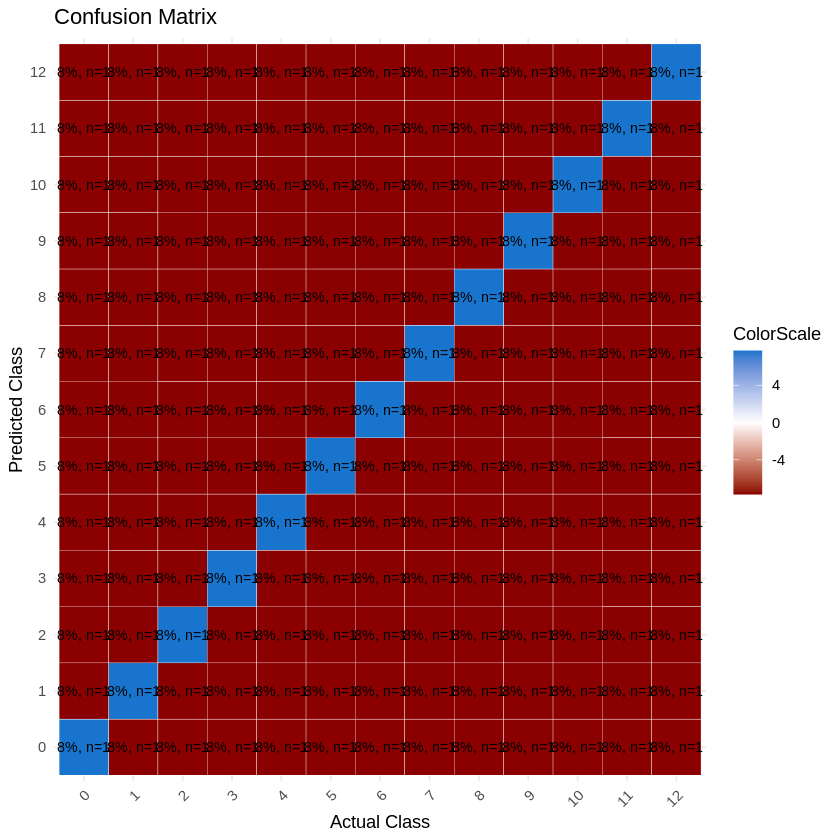

In [120]:
prettyConfused(Actual = confusion_df$Reference, Predict = confusion_df$Prediction, text.scl=3)